In [7]:
import warnings
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob

In [60]:
# Load data
data = pd.read_csv('sentimentdataset.csv')

# Print the shape of dataframe
print(data.shape)

# Print top 5 rows
data.head(5)

(732, 15)


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [61]:
data['Sentiment'].value_counts()

Sentiment
 Positive           44
 Joy                42
 Excitement         32
 Neutral            14
 Contentment        14
                    ..
 Adrenaline          1
 Harmony             1
 ArtisticBurst       1
 Radiance            1
 Elegance            1
Name: count, Length: 279, dtype: int64

In [10]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [62]:
# Drop unnecessary columns
data = data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [12]:
data.isnull().sum()

Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

In [63]:
# Handle missing values
data = data.dropna(subset=['Text', 'Sentiment', 'Timestamp'])

In [64]:
# Preprocess text
def clean_text(text):
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove hashtag symbols
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

data['Cleaned_Text'] = data['Text'].apply(clean_text)

In [70]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()
# Function to compute sentiment using VADER
def get_vader_sentiment(text):
    scores = analyzer.polarity_scores(text)  # Get polarity scores
    compound_score = scores['compound']     # Use the compound score
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply VADER to the Text column
data['Polarity'] = data['Cleaned_Text'].apply(get_vader_sentiment)


In [71]:
data['Polarity'].value_counts()

Polarity
Positive    468
Negative    182
Neutral      82
Name: count, dtype: int64

In [75]:
# Show sample
for i in range(10):
    print(f"{i+1}: {data['Cleaned_Text'][i]} -> {data['Polarity'][i]}")

1:  enjoying a beautiful day at the park               -> Positive
2:  traffic was terrible this morning                  -> Negative
3:  just finished an amazing workout                 -> Positive
4:  excited about the upcoming weekend getaway         -> Positive
5:  trying out a new recipe for dinner tonight         -> Neutral
6:  feeling grateful for the little things in life     -> Positive
7:  rainy days call for cozy blankets and hot cocoa    -> Negative
8:  the new movie release is a mustwatch              -> Neutral
9:  political discussions heating up on the timeline   -> Neutral
10:  missing summer vibes and beach days                -> Negative


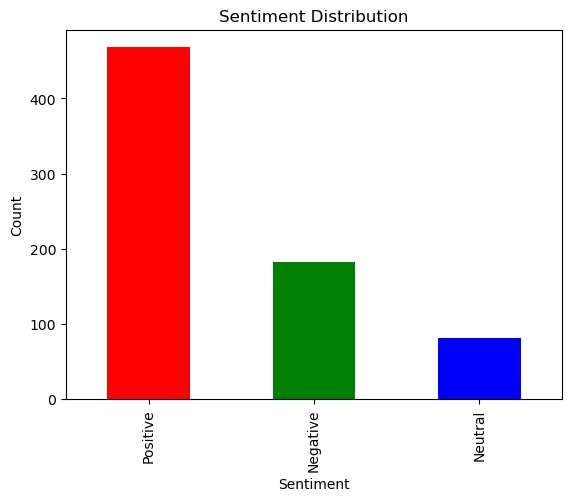

In [76]:
# Sentiment Proportion
sentiment_counts = data['Polarity'].value_counts()
sentiment_counts.plot(kind='bar', title='Sentiment Distribution', color=['red', 'green', 'blue', 'gray'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Maximum sentiments are positive

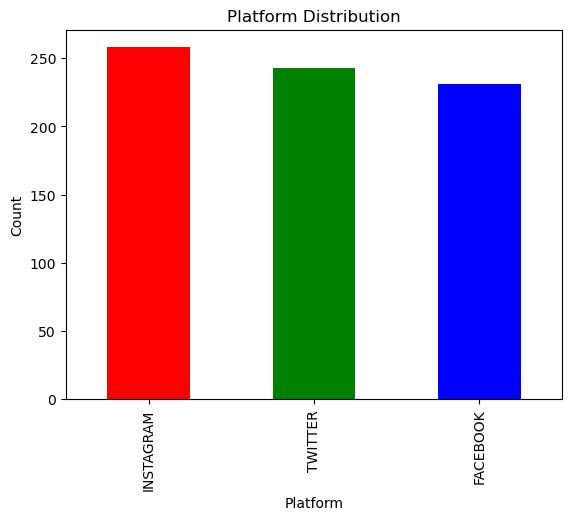

In [79]:
# Platform counts
data['Platform'] = data['Platform'].str.strip().str.upper()
sentiment_counts = data['Platform'].value_counts()
sentiment_counts.plot(kind='bar', title='Platform Distribution', color=['red', 'green', 'blue', 'gray'])
plt.xlabel('Platform')
plt.ylabel('Count')
plt.show()

# Instaram accounts for maximum tweets

In [22]:
# Convert Timestamp to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Date'] = data['Timestamp'].dt.date
data['Hour'] = data['Timestamp'].dt.hour

# Group sentiment over time
sentiment_trend = data.groupby(['Date', 'Polarity']).size().unstack(fill_value=0)

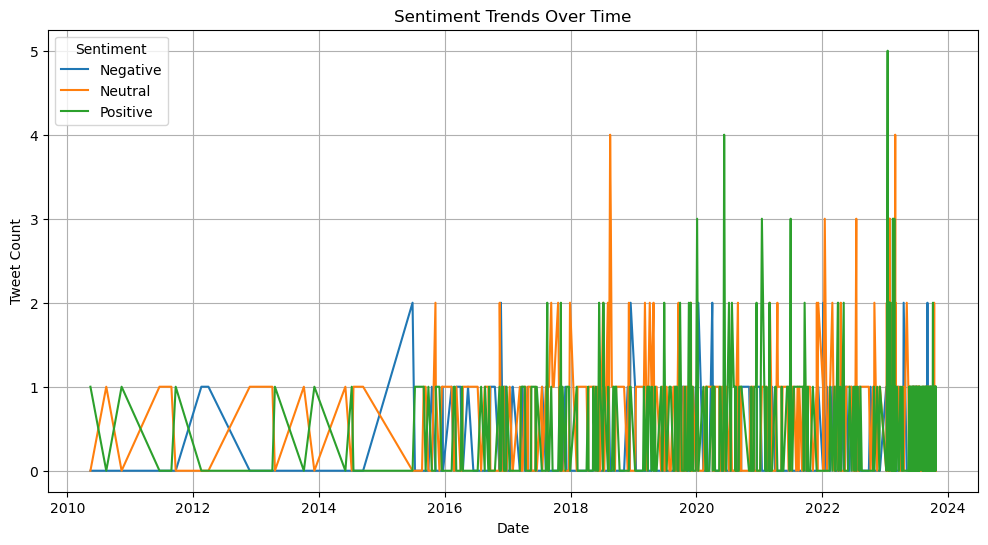

In [77]:
# Plot sentiment trends
plt.figure(figsize=(12, 6))
sentiment_trend.plot(kind='line', ax=plt.gca())
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.legend(title='Sentiment')
plt.grid()
plt.show()

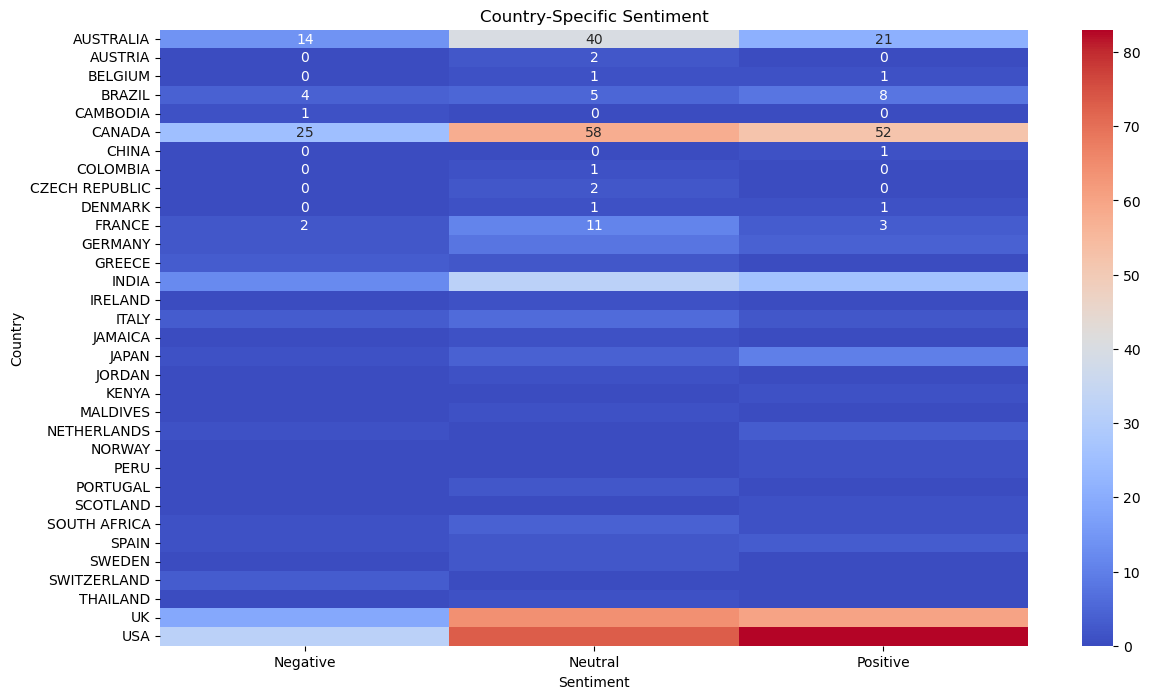

In [30]:
# Country-specific sentiment
country_sentiment = data.groupby(['Country', 'Polarity']).size().unstack(fill_value=0)

# Plot country-specific sentiment as a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(country_sentiment, annot=True, fmt='d', cmap='coolwarm')
plt.title('Country-Specific Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Country')
plt.show()


In [28]:
data['Country'] = data['Country'].str.strip().str.upper()

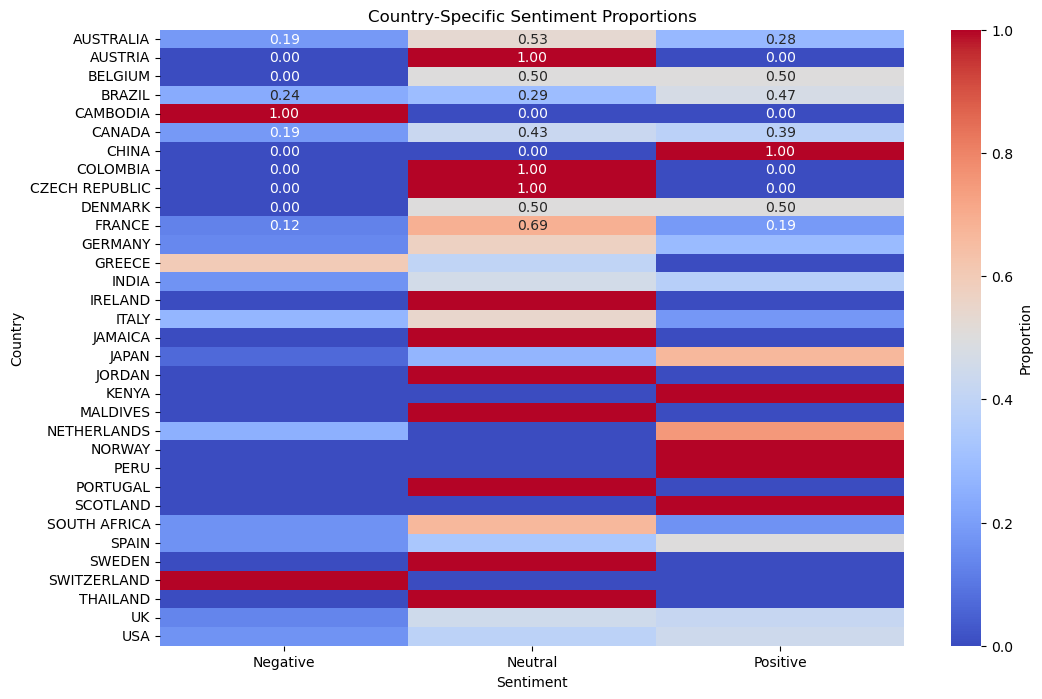

In [29]:
# Group data by country and sentiment
country_sentiment = data.groupby(['Country', 'Polarity']).size().unstack(fill_value=0)

# Normalize counts to proportions (optional)
country_sentiment_normalized = country_sentiment.div(country_sentiment.sum(axis=1), axis=0)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(country_sentiment_normalized, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Proportion'})
plt.title('Country-Specific Sentiment Proportions')
plt.xlabel('Sentiment')
plt.ylabel('Country')
plt.show()

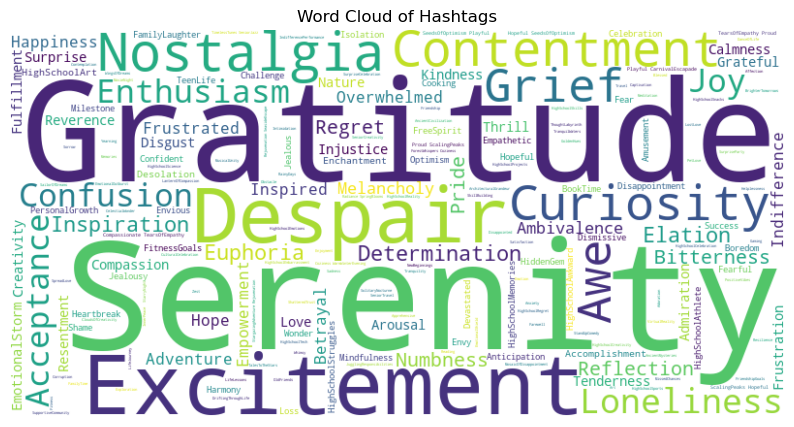

In [18]:
# Word cloud for hashtags (optional)
all_hashtags = " ".join(data['Hashtags'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_hashtags)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Hashtags')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Split multiple hashtags into individual entries
data['Hashtags'] = data['Hashtags'].fillna('')
data['Hashtags'] = data['Hashtags'].apply(lambda x: x.split(','))

# Explode the hashtags to create one row per hashtag
hashtags_data = data.explode('Hashtags')

# Group by Hashtag and Sentiment
hashtag_sentiment = hashtags_data.groupby(['Hashtags', 'Polarity']).size().unstack(fill_value=0)

# Sort hashtags by total count
top_hashtags = hashtag_sentiment.sum(axis=1).sort_values(ascending=False).head(10)

# Filter data for top hashtags
filtered_hashtags = hashtag_sentiment.loc[top_hashtags.index]

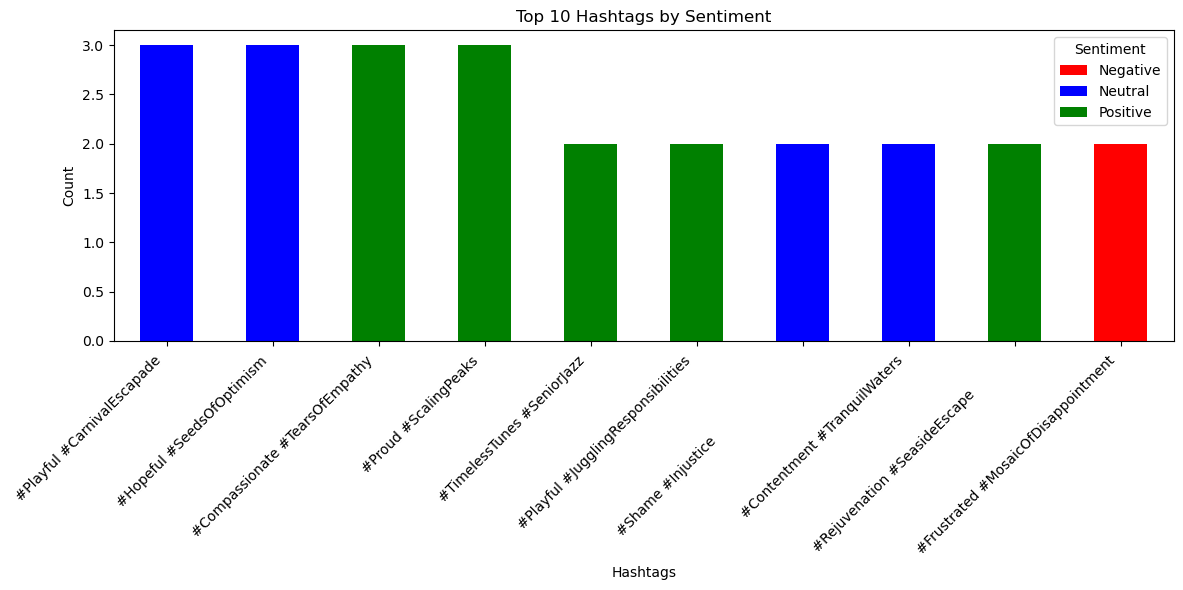

In [34]:
# Plot bar chart
filtered_hashtags.plot(kind='bar', stacked=True, figsize=(12, 6), color=['red', 'blue', 'green'])
plt.title('Top 10 Hashtags by Sentiment')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

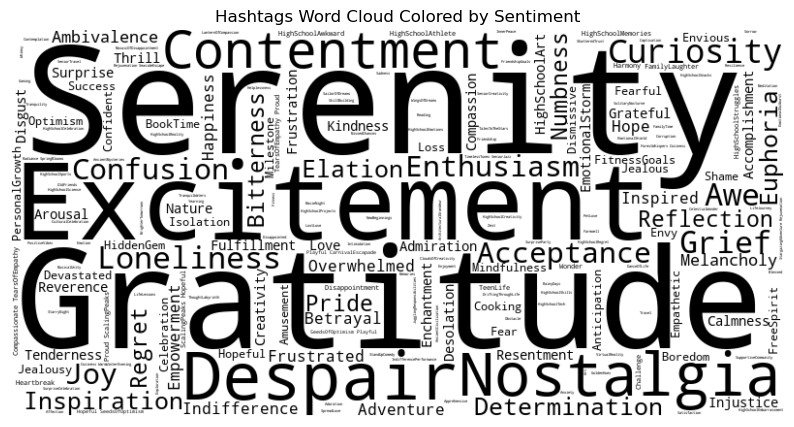

In [36]:
#Hastag word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assign colors to sentiments
sentiment_colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'gray'}

# Generate text and colors for word cloud
hashtag_text = " ".join(hashtags_data['Hashtags'].dropna())
dominant_sentiments = hashtags_data.groupby('Hashtags')['Polarity'].agg(lambda x: x.value_counts().idxmax())
color_dict = {hashtag: sentiment_colors[dominant_sentiments[hashtag]] for hashtag in dominant_sentiments.index}

# Generate word cloud
wordcloud = WordCloud(
    width=800, height=400, background_color='white', color_func=lambda *args, **kwargs: color_dict.get(args[0], 'black')
).generate(hashtag_text)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Hashtags Word Cloud Colored by Sentiment')
plt.show()

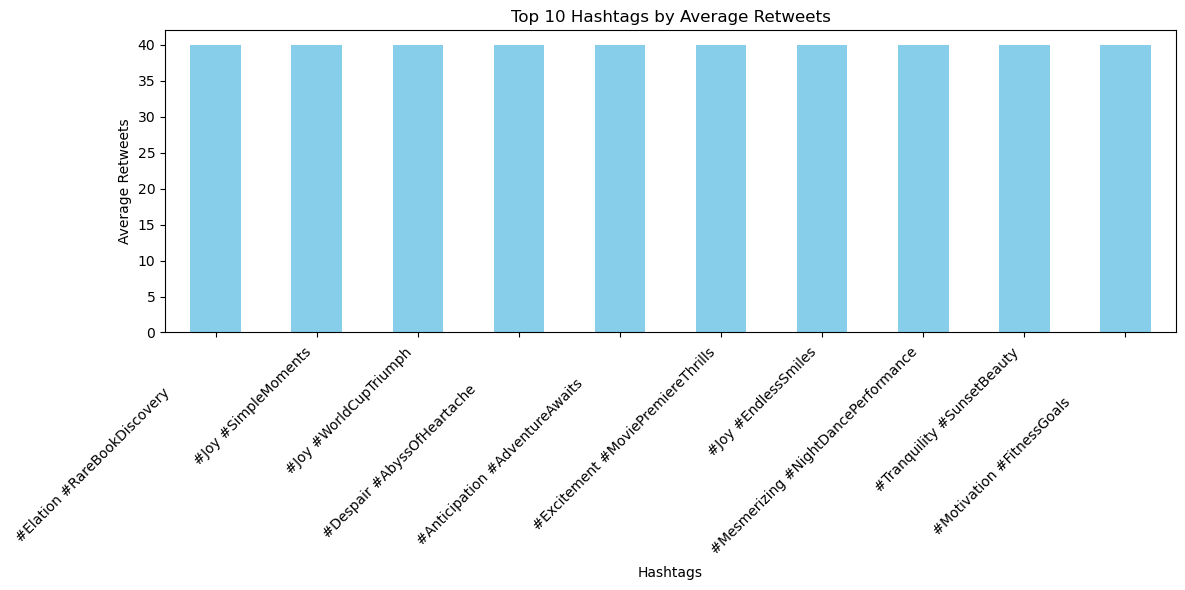

In [37]:
# Prepare data: Calculate average retweets per hashtag
hashtags_data['Hashtags'] = hashtags_data['Hashtags'].fillna('')
hashtag_retweets = hashtags_data.groupby('Hashtags')['Retweets'].mean().sort_values(ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
hashtag_retweets.plot(kind='bar', color='skyblue')
plt.title('Top 10 Hashtags by Average Retweets')
plt.xlabel('Hashtags')
plt.ylabel('Average Retweets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()